W folderze dane_testowe znajdują się pliki .WAV z nagraniami mowy. Nazwa pliku składa się z ID osoby nagranej oraz treści nagrania: 'phrase', gdy osoba mówi całą frazę oraz nazwa samogłoski, gdy wypowiada jedynie samogłoskę (w tym przypadku dodatkowo określona jest wysokość dźwięku - wysoki 'h', niski 'l' lub normalny 'n').
Źródło danych: http://stimmdb.coli.uni-saarland.de

Utwórz listę plików, które zawierają nagrania osób o ID wymienionych poniżej:
ids_to_get = [1, 10, 95, 110, 121, 144, 676, 699, 888, 910, 1182, 1204, 1207, 1528, 1860, 1897, 1972, 2102, 2152, 2444]
Sprawdź, ile jest tych plików. Zapisz listę plików do pliku (.TXT lub dowolnego innego, np. używając funkcji np.save). Zgłoś wykonanie tej części zadania - sprawdzimy, czy jest dobrze.

In [3]:
# Zacznij tutaj od importu potrzebnych bibliotek.
import os
import numpy as np
from scipy.io.wavfile import read as read_wav
from scipy.signal import spectrogram
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import pickle
from pathlib import Path

Do dalszych analiz weź jedynie pliki zawierające całą frazę (a nie pojedyncze samogłoski). Utwórz listę takich plików, zapisz ją do pliku.

In [4]:
path = '/home/student/Desktop/weronika/lab 2/Zadania i pliki-20231017/dane_testowe/dane_testowe'

ids_to_get = [1, 10, 95, 110, 121, 144, 676, 699, 888, 910, 1182, 1204, 1207, 1528, 1860, 1897, 1972, 2102, 2152, 2444]
all_files = Path('/home/student/Desktop/weronika/lab 2/Zadania i pliki-20231017/dane_testowe/dane_testowe').glob('*.*')
#files = [x for x in all_files if x.is_file()]


all_files = os.listdir(path)
files_with_phrase = []
files = []
for file in all_files:
    for file_id in ids_to_get:
        if file.startswith(f"{file_id}-"):
            files.append(file)
        if file.startswith(f"{file_id}-phrase"):
            files_with_phrase.append(file)

print(files)
print(files_with_phrase)

np.save(path, 'lista_plikow_o_zadanych_ID', files) #zapis do pliku .npy

['910-phrase.wav', '110-phrase.wav', '121-phrase.wav', '1897-phrase.wav', '888-phrase.wav', '888-i_l.wav', '1860-phrase.wav', '1207-phrase.wav', '676-phrase.wav', '1182-phrase.wav', '888-u_h.wav', '1528-phrase.wav', '2102-phrase.wav', '95-phrase.wav', '1204-phrase.wav', '2444-phrase.wav', '144-u_n.wav', '144-phrase.wav', '144-u_h.wav', '144-a_l.wav', '699-phrase.wav', '144-a_h.wav', '1-phrase.wav', '10-phrase.wav', '2152-phrase.wav', '1972-phrase.wav']
['910-phrase.wav', '110-phrase.wav', '121-phrase.wav', '1897-phrase.wav', '888-phrase.wav', '1860-phrase.wav', '1207-phrase.wav', '676-phrase.wav', '1182-phrase.wav', '1528-phrase.wav', '2102-phrase.wav', '95-phrase.wav', '1204-phrase.wav', '2444-phrase.wav', '144-phrase.wav', '699-phrase.wav', '1-phrase.wav', '10-phrase.wav', '2152-phrase.wav', '1972-phrase.wav']


Wczytaj pliki .WAV, które znajdują się na powyższej liście i sprawdź, jaką mają częstotliwość próbkowania, np. używając funkcji read_wav (from scipy.io.wavfile import read as read_wav https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html). 

Teraz wystarczy sprawdzić dla jednego sygnału, wszystkie mają taką samą. Przy pracy z nowymi danymi, o których tego nie wiemy, należy sprawdzić, czy na pewno częstotliwość próbkowania wszystkich sygnałów jest taka sama i w razie potrzeby ją odpowiednio zmienić.

In [11]:
files_with_phrase = [file for file in all_files if 'phrase' in file]
print(files_with_phrase)
print(len(files_with_phrase)) #dlugosc to 20 elementow

#fs, signal = read_wav(path + files_with_phrase[1])
fs, signal = read_wav('/home/student/Desktop/weronika/lab 2/Zadania i pliki-20231017/dane_testowe/dane_testowe/' + files_with_phrase[3])
print(fs)


['910-phrase.wav', '870-phrase.wav', 'files_with_phrase.npy', '110-phrase.wav', '121-phrase.wav', '1897-phrase.wav', '888-phrase.wav', '1860-phrase.wav', '1207-phrase.wav', '676-phrase.wav', '1182-phrase.wav', '1528-phrase.wav', '2102-phrase.wav', '95-phrase.wav', '1204-phrase.wav', '2444-phrase.wav', '1610-phrase.wav', '144-phrase.wav', '699-phrase.wav', '2145-phrase.wav', '1-phrase.wav', '10-phrase.wav', '2152-phrase.wav', '1972-phrase.wav']
24
16000


Wylicz i wyświetl spektrogram dowolnego sygnału, np. używając funkcji spectrogram z biblioteki scipy (from scipy.signal import spectrogram https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html). Sprawdź, jakie wymiary ma macierz zawierająca spektrogram.

(129, 159)


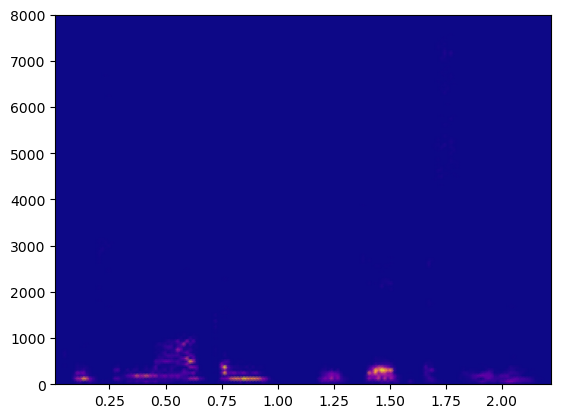

In [12]:


f, t, Sxx = spectrogram(signal, fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud', cmap='plasma')
print(np.shape(Sxx)) #wymiary macierzy spektogramu



Wylicz spektrogramy pozostałych sygnałów i umieść je w jednej macierzy 3D (liczba sygnałów x liczba pasm częstotliwości x liczba ramek).

Uwaga na długości sygnałów - nie są takie same, więc trzeba albo przyciąć wszystkie spektrogramy do długości liczby ramek) najkrótszego, ale wszystkie uzupełnić zerami (tzw. zero-padding) do długości najdłuższego.

In [20]:
spectrograms = []
sig_len = []
for file in files_with_phrase:
    fs, signal = read_wav("/home/student/Desktop/weronika/lab 2/Zadania i pliki-20231017/dane_testowe/dane_testowe/" + file)
    _, _, Sxx = spectrogram(signal, fs)
    spectrograms.append(Sxx) #dodajemy spektrogramy do listy - otrzymujemy w ten sposób listę macierzy 2D
    sig_len.append(np.shape(Sxx)[1]) #dodajemy liczbę ramek spektrogramu do listy
    
    padded_spectrograms = np.zeros((len(sig_len), spectrograms[0].shape[0], np.max(sig_len)))
for i, values in enumerate(spectrograms):
    padded_spectrograms[i, :, 0:values.shape[1]] = values
spectrograms = padded_spectrograms
spectrograms.shape


ValueError: File format b'\x93NUM' not understood. Only 'RIFF' and 'RIFX' supported.

Plikom z nagraniami osób o ID = [110, 144, 888, 910, 1204, 1897, 1972, 2102, 2152, 2444] przyporządkuj label 1, pozostałym label 0. Wykorzystaj stworzoną wcześniej listę plików, żeby mieć pewność, że do każdego sygnału przypisany jest właściwy label (utwórz wektor zawierający labele w takiej kolejności, w jakiej są odpowiednie dane w utworzonej przed chwilą macierzy cech (spektrogramów)).

In [18]:
labels = np.zeros(len(files_with_phrase))
ID = [110, 144, 888, 910, 1204, 1897, 1972, 2102, 2152, 2444]
for count, value in enumerate(files_with_phrase): #enumerate zwraca dwie rzeczy - count, czyli indeks elementu listy
                                                #oraz value, czyli wartość tego elementu
    for i in ID:
        if value.startswith(str(i)+'-'):
            labels[count] = 1

Dane należy podzielić na zbiór uczący, na którym będzie prowadzony trening klasyfikatora oraz zbiór testowy, na którym będzie prowadzona ewaluacja. Dzielimy zarówno macierz z danymi (wyekstrahowanymi cechami) oraz wektor z labelami. Zbiory uczący i testowy zawsze oznacza się jako X_train i X_test, a ich labele jako y_train i y_test.

Podziel teraz macierz cech oraz wektor labeli na zbiór uczący i testowy w stosunku 0.8:0.2. Możesz to zrobić funkcją train_test_split z biblioteki sklearn (patrz dokumentacja: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split). Zadbaj o stratyfikację danych (czyli podział na zbiory w taki sposób, żeby zachowany był rozkład poszczególnych klas w obu tworzonych zbiorach). Jaki wpływ na uzyskany klasyfikator może mieć pominięcie stratyfikacji?

In [19]:
X_train, X_test, y_train, y_test = train_test_split(spectrograms, labels, test_size=0.2, random_state=42, stratify=labels)

ValueError: Found input variables with inconsistent numbers of samples: [2, 24]

Zastanów się, czy można było zmienić kolejność dotychczas wykonanych kroków? Jeśli tak, to w jaki sposób?

"Spłaszcz" dane, żeby z dwuwymiarowego spektrogramu uzyskać wektor - większość klasyfikatorów nie przyjmuje na wejściu obrazów (danych 2D), więc ten krok jest konieczny.

Podpowiedź: X_train powinien mieć po tej operacji wymiary 16 x 12126

Spróbuj wytrenować dowolny klasyfikator oraz przeprowadzić predykcję na zbiorze testowym: https://scikit-learn.org/stable/supervised_learning.html
W dokumentacji są przykłady, jak używać każdego z klasyfikatorów.

Na ostatnich zajęciach ze statystyki był omawiany klasyfikator k najbliższych sąsiadów, więc najprościej wybrać jego.
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Zapisz klasyfikator do pliku przy użyciu pickle'a. Spróbuj go potem wczytać (przypisując go do nowej zmiennej, żeby w razie czego nie nadpisać sobie działającego modelu).

Teraz przeprowadź predykcję na danych testowych, czyli podaj do funkcji X_test i zobacz, do jakich klas zostaną przyporządkowane obiekty. Nie używamy wektora y_test - on służy jedynie do sprawdzenia, czy predykcje są prawidłowe.

In [ ]:
preds = nazwa_modelu.predict(X_test) #zamiast nazwa_modelu wpisz nazwę zmiennegj, do której przypisany jest 
                                    #stworzony przed chwilą klasyfikator

Mając wytrenowany klasyfikator trzeba sprawdzić, czy on się w ogóle do czegoś nadaje, czyli czy ma zdolność do uogólniania zależności widocznych w zbiorze uczącym tak, żeby na zbiorze testowym również uzyskać dobre wyniki.

Klasyfikator należy spróbować ocenić w sposób obiektywny - do tego służą tzw. metryki sukcesu, które jednoznacznie określają, jak dobrze klasyfikator potrafi klasyfikować obiekty należące do poszczególnych klas, czy jest tak samo dobry w przypadku każdej z analizowanych klas, czy może lepiej radzi sobie z jedną z nich. Takich metryk jest stosunkowo dużo, są wymienione w dokumentacji biblioteki scikit-learn: 

https://scikit-learn.org/stable/modules/model_evaluation.html

Zacznijmy od wyznaczenia i analizy macierzy pomyłek. W przypadku klasyfikacji binarnej (z tylko dwiema klasami, zazwyczaj oznaczanymi labelami 0 i 1 lub słownie "negative" i "positive") jest to macierz, w której zliczone są wyniki klasyfikacji podzielone na 4 grupy:
- prawdziwie pozytywne, TP (ang. true positive) - obiekt z klasy 1 zaklasyfikowany do klasy 1
- prawdziwie negatywne, TN (ang. true negative) - obiekt z klasy 0 zaklasyfikowany do klasy 0
- fałszywie pozytywne, FP (ang. false positive) - obiekt z klasy 0 zaklasyfikowany do klasy 1
- fałszywie negatywne, FN (ang. false negative) - obiekt z klasy 1 zaklasyfikowany do klasy 0

W idealnym przypadku uzyskujemy wartości inne niż 0 jedynie na przekątnej macierzy - to znaczy, że wszystkie obiekty ze zbioru zostały zaklasyfikowane prawidłowo. W praktyce to rzadko ma miejsce, ale zawsze dążymy do tego, by uzyskać jak najmniejsze FN i FP.

W przypadku więcej niż 2 klas, macierz jest odpowiednio rozbudowana o klasę 0 zaklasyfikowaną jako 2 itd. Macierz zawsze ma wymiary n x n, gdzie n to liczba klas w analizowanym zbiorze danych.

Do wyznaczenia macierzy pomyłek używa się funkcji confusion_matrix() z biblioteki scikit-learn.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [ ]:
from sklearn.metrics import confusion_matrix
#z dokumentacji: confusion_matrix(y_true, y_pred) - y_pred to wektor z klasami, do których klasyfikator 
                                                    #przyporządkował obiekty, a y_true to wektor zawierający
                                                    #rzeczywiste klasy, czyli y_test
    
#tu użyj funkcji i wyznacz macierz pomyłek. Wyświetl ją i zobacz, jak poradził sobie wytrenowany klasyfikator.



Najpopularniejsze z metryk wyliczanych na podstawie macierzy pomyłek to:
- dokładność (ang. accuracy): (TP+TN)/(TP+TN+FP+FN)
- czułość (ang. recall): TP/(TP+FN)
- precyzja (ang. precision): TP/(TP+FP)
- F1: 2 * precision * recall/(precision+recall)

Wylicz te 4 metryki dla swoich danych i predykcji.

(Często używane są też ROC AUC i log_loss, ale je omówimy na innych zajęciach.)

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

Z reguły nie wystarczy wyznaczenie tylko jednej z nich, by mieć pewność, że klasyfikator jest dobry. Należy o tym pamiętać zwłaszcza w przypadku, gdy różnica pomiędzy liczebnością klas jest duża. Poniżej przykład na syntetycznych danych.

In [ ]:
y_true = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]
y_pred = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

#wylicz metryki dla powyższych dwóch wektorów

Jak widać w wektorze y_pred są jedynie 0 - klasyfikator, który zwrócił wektor y_pred uznał, że wszystkie obiekty należą do klasy 0, a więc nie jest to dobry klasyfikator. Czy ma to odzwierciedlenie w wyliczonych metrykach? Która z nich najmniej nadaje się do oceny klasyfikatora, jeżeli mamy dużą rozbieżność w liczebności klas?